<a href="https://colab.research.google.com/github/nik-hil-29/component-library/blob/main/store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:

holiday_events = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/holidays_events.csv"))
oil = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/oil.csv"))
sample_sub = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/sample_submission.csv"))
stores = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/stores.csv"))
test = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/test.csv"))
train = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/train.csv"))
transactions = pd.DataFrame(pd.read_csv("/gdrive/MyDrive/store-sales-time-series-forecasting/transactions.csv"))

In [ ]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holiday_events.shape

(350, 6)

In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil.shape

(1218, 2)

In [ ]:
sample_sub.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [ ]:
sample_sub.shape

(28512, 2)

In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores.shape

(54, 5)

In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test.shape

(28512, 5)

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train.shape

(3000888, 6)

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.shape

(83488, 3)

In [ ]:
train = train.merge(stores, on ='store_nbr')
train = train.merge(oil, on ='date', how='left')
holiday_events = holiday_events.rename(columns={'type': 'holiday_type'})
train = train.merge(holiday_events, on='date', how='left')

In [ ]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
nbr_stores = train["store_nbr"].nunique()
nbr_stores

54

In [ ]:
nbr_states = train["state"].nunique()
nbr_states

16

In [ ]:
nbr_city = train["city"].nunique()
nbr_city

22

In [ ]:
nbr_products = train["family"].nunique()
nbr_products

33

In [ ]:
nbr_locale_name = train['locale_name'].nunique()
nbr_locale_name

24

In [ ]:
sales_by_store = train.groupby("store_nbr")["sales"].sum().sort_values(ascending=False)
sales_by_store

store_nbr
44    6.335614e+07
45    5.568902e+07
47    5.202448e+07
3     5.153353e+07
49    4.434682e+07
46    4.280473e+07
48    3.674180e+07
51    3.360386e+07
8     3.112407e+07
50    2.927375e+07
11    2.890653e+07
7     2.746456e+07
9     2.696988e+07
6     2.572079e+07
24    2.423379e+07
2     2.202688e+07
39    2.066577e+07
37    2.035796e+07
27    1.960276e+07
4     1.930519e+07
38    1.924817e+07
28    1.879969e+07
40    1.875920e+07
17    1.841613e+07
31    1.814026e+07
34    1.742014e+07
43    1.672204e+07
5     1.590438e+07
36    1.565237e+07
41    1.533546e+07
33    1.447138e+07
1     1.440362e+07
18    1.355196e+07
20    1.338071e+07
19    1.331201e+07
23    1.188602e+07
15    1.166691e+07
25    1.165464e+07
14    1.161044e+07
53    1.156170e+07
54    1.131137e+07
16    1.120520e+07
12    1.087690e+07
13    1.073088e+07
29    9.977453e+06
10    9.819049e+06
21    9.507988e+06
42    9.170313e+06
26    7.929032e+06
35    7.822669e+06
30    7.538101e+06
32    6.070115e+06
22

In [ ]:
sales_table = pd.DataFrame({
    "store_nbr": sales_by_store.index,
    "total_sales": sales_by_store.values
})

In [ ]:
sales_table.head()

,store_nbr,total_sales
0,44,6.335614e+07
1,45,5.568902e+07
2,47,5.202448e+07
3,3,5.153353e+07
4,49,4.434682e+07


In [ ]:
sales_by_product = train.groupby("family")["sales"].sum().sort_values(ascending = False)


In [ ]:
train["date"] = pd.to_datetime(train["date"])

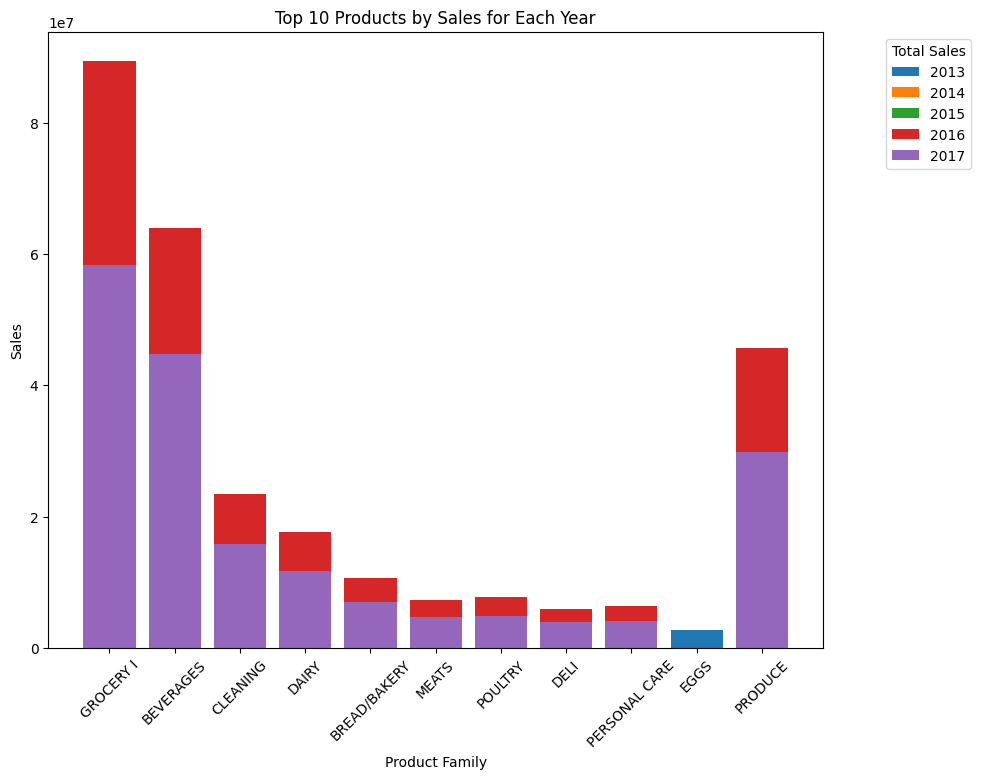

In [ ]:

train["year"] = train["date"].dt.year


sales_by_year_and_product = train.groupby(["year", "family"])["sales"].sum().reset_index()


sales_by_year_and_product = sales_by_year_and_product.sort_values(by=["year", "sales"], ascending=[True, False])


fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over the years and plot the top 10 products for each year
for year in sales_by_year_and_product["year"].unique():
    top_products = sales_by_year_and_product[sales_by_year_and_product["year"] == year].head(10)
    ax.bar(top_products["family"], top_products["sales"], label=str(year))


ax.set_xlabel("Product Family")
ax.set_ylabel("Sales")
ax.legend(title="Total Sales", loc="upper right", bbox_to_anchor=(1.2, 1))


plt.xticks(rotation=45)


ax.set_title("Top 10 Products by Sales for Each Year")

plt.show()

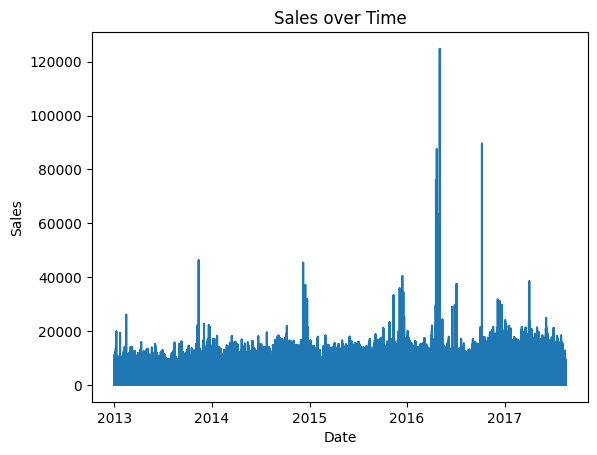

In [ ]:

plt.plot(train['date'],train['sales'])

plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')


plt.show()

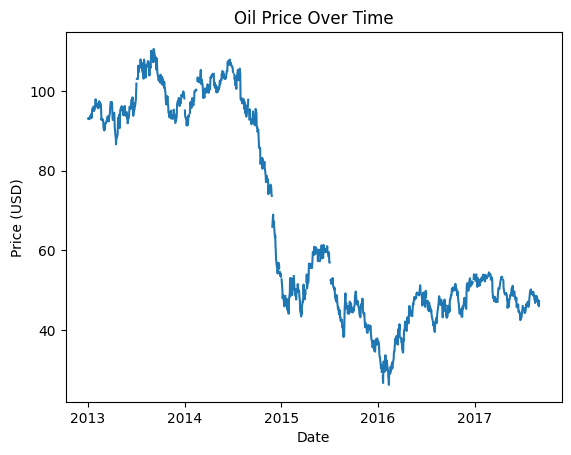

In [ ]:
oil["date"] = pd.to_datetime(oil["date"])


plt.plot(oil['date'], oil['dcoilwtico'])


plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')


plt.show()

In [ ]:
sales_by_store.describe()

count    5.400000e+01
mean     2.030694e+07
std      1.357171e+07
min      2.764970e+06
25%      1.137395e+07
50%      1.631321e+07
75%      2.534904e+07
max      6.335614e+07
Name: sales, dtype: float64

In [ ]:
train['date'] = pd.to_datetime(train['date'])
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,locale_name,description,transferred,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017


In [ ]:
print("Rows: ", train.shape)
print("Remove duplicates rows:", train.drop_duplicates().shape)

Rows:  (3054348, 17)
Remove duplicates rows: (3054348, 17)


In [ ]:
train_sale_prom = train.groupby('date')['sales','onpromotion'].sum().reset_index()
print(train_sale_prom)

           date          sales  onpromotion
0    2013-01-01    2511.618999            0
1    2013-01-02  496092.417944            0
2    2013-01-03  361461.231124            0
3    2013-01-04  354459.677093            0
4    2013-01-05  477350.121229            0
...         ...            ...          ...
1679 2017-08-11  826373.722022        14179
1680 2017-08-12  792630.535079         8312
1681 2017-08-13  865639.677471         9283
1682 2017-08-14  760922.406081         8043
1683 2017-08-15  762661.935939        10605

[1684 rows x 3 columns]


<ipython-input-122-5ff745fa5bb9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_sale_prom = train.groupby('date')['sales','onpromotion'].sum().reset_index()


In [ ]:
ts = train_sale_prom['sales']

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(ts)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.931646
p-value: 0.041790
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Determine Order of Differencing


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 1.0, 'Residual Plot')

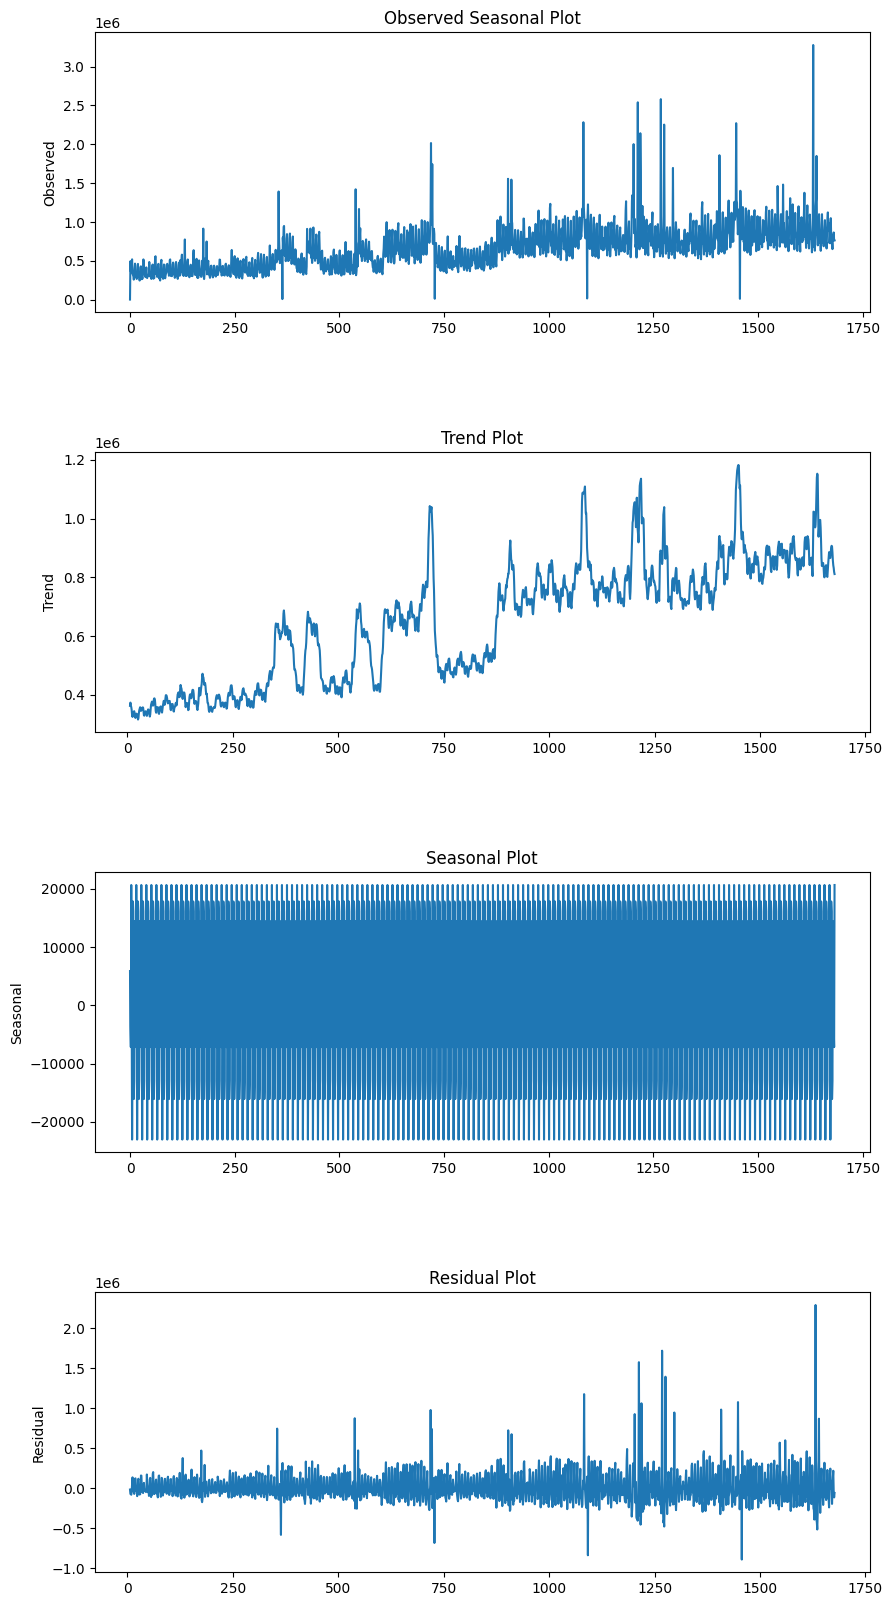

In [ ]:
#decompose the time series
decomposition = seasonal_decompose(train_sale_prom['sales'], model='additive', period=12)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5) # added space between subplots

decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
axes[0].set_title('Observed Seasonal Plot')

decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Plot')

decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Plot')

decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Plot')

Identify Order of AR and MA Terms

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

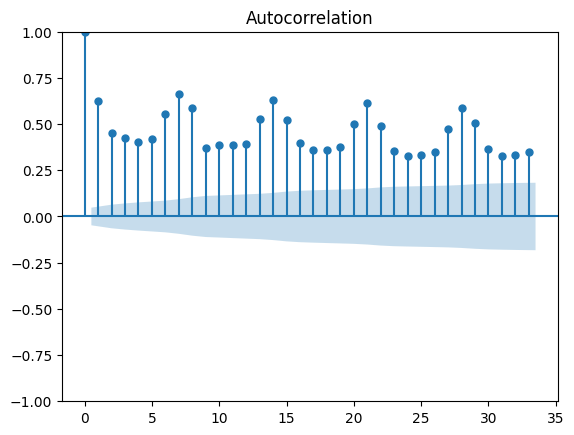

In [ ]:
plot_acf(train_sale_prom['sales'], alpha = 0.05);

We have a correlation with 1 and 7 day sales in the past;

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


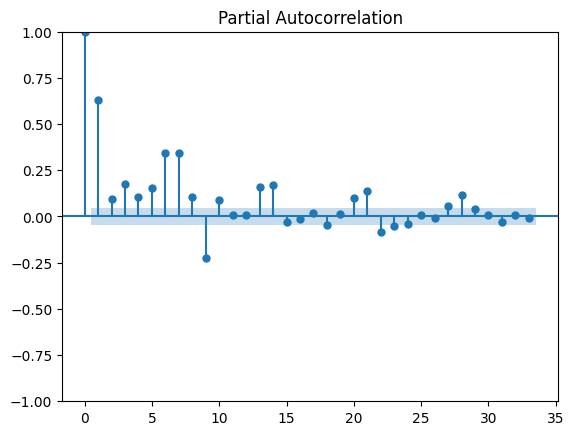

In [ ]:
plot_pacf(train_sale_prom['sales'], alpha = 0.05);

As we can see, we have a seasonal pattern on day 5,6 and 15, 16, that is, for every 5 days we have an increase in sales.

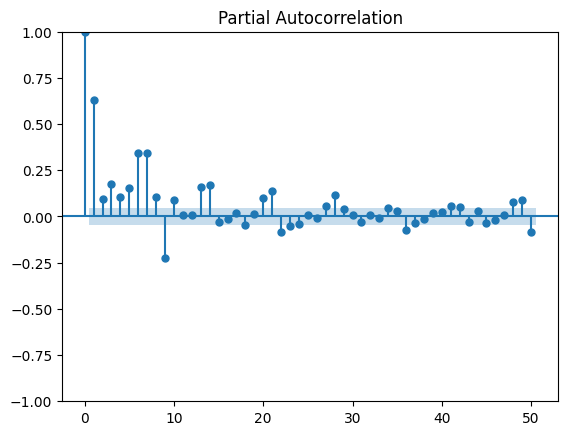

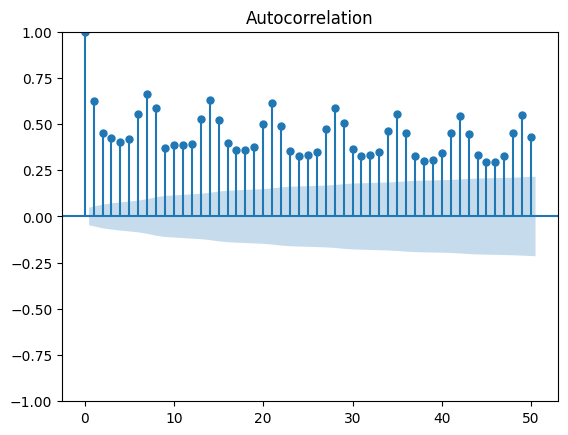

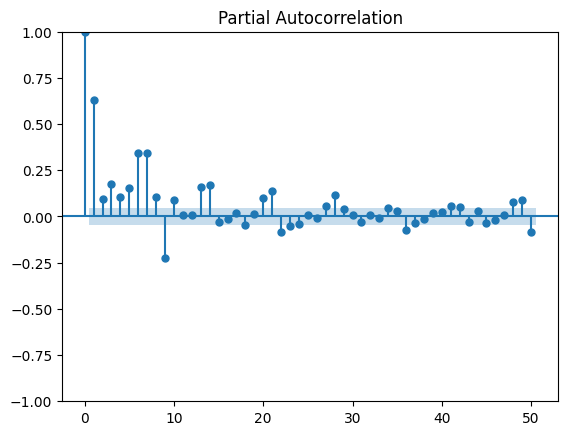

In [ ]:
import statsmodels.api as sm

p = 1
d = 1
q = 1

train_np = train_sale_prom['sales'].values.astype('float64')
model = sm.tsa.ARIMA(train_np, order=(p, d, q))


# Define the order of differencing, AR, and MA terms
model_fit = model.fit()

# Plot ACF and PACF
plot_acf(train_np, lags=50)
plot_pacf(train_np, lags=50)

In [ ]:
train_sale_prom['date'] = pd.to_datetime(train_sale_prom['date'])
train_sale_prom= train_sale_prom.set_index('date')

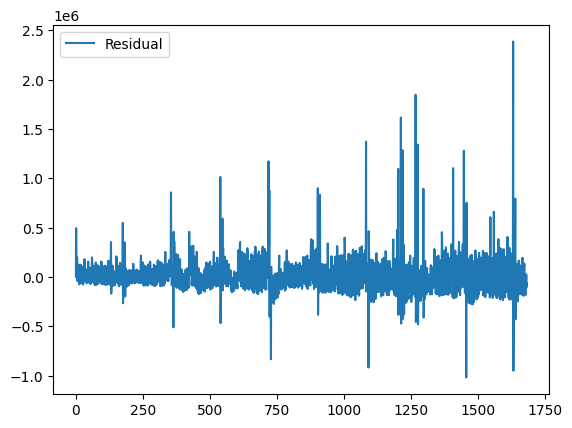

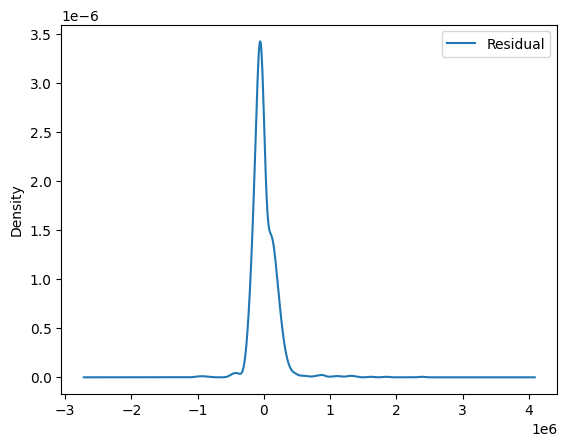

           Residual
count  1.684000e+03
mean   5.818311e+03
std    1.966088e+05
min   -1.016637e+06
25%   -9.324641e+04
50%   -3.202403e+04
75%    9.393068e+04
max    2.385657e+06


In [ ]:
# Model diagnostics
residuals = pd.DataFrame(model_fit.resid, columns=['Residual'])
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

In [ ]:
# define the order of differencing, AR, and MA terms
p = 1
d = 1
q = 1

# extract the target variable as a numpy array
train_np = train_sale_prom['sales'].values.astype('float64')

# fit the ARIMA model
model = sm.tsa.ARIMA(train_np, order=(p, d, q))

# train the ARIMA model
results = model.fit()

# print the summary of the trained model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1684
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22918.921
Date:                Tue, 20 Jun 2023   AIC                          45843.843
Time:                        13:47:13   BIC                          45860.128
Sample:                             0   HQIC                         45849.875
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3068      0.017     18.557      0.000       0.274       0.339
ma.L1         -0.9574      0.007   -128.980      0.000      -0.972      -0.943
sigma2      4.734e+10   9.47e-15      5e+24      0.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming your training data is stored in a DataFrame called "train"
y_train = train_sale_prom['sales']
X_train = train_sale_prom['onpromotion']

# Define and fit the SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
model_fit = model.fit()

# Make predictions on the training data
y_pred = model_fit.predict(start=train_sale_prom.index[0], end=train_sale_prom.index[-1], exog=X_train)

# Calculate mean absolute error and mean squared error
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print('MAE:', mae)
print('MSE:', mse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 77501.84203050827
MSE: 18170030669.250286


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

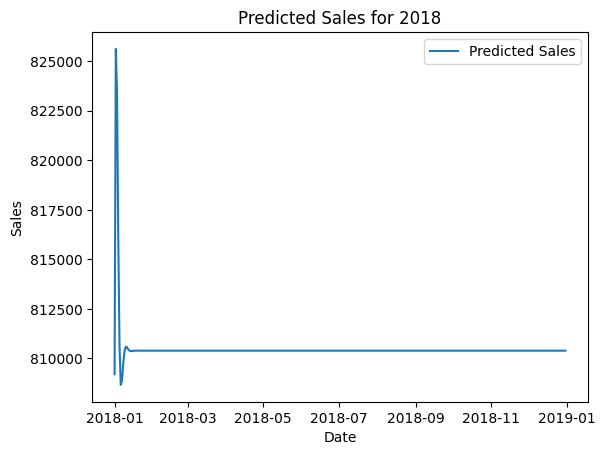

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train ARIMA model on sales data
model = SARIMAX(train_sale_prom['sales'], order=(2,1,2))
model_fit = model.fit()

# Predict sales for the next year
predicted_sales = model_fit.forecast(steps=365)

# Create a list of dates for the year 2018
dates_2018 = pd.date_range(start='2018-01-01', end='2018-12-31')

# Plot the predicted sales data for the year 2019
plt.plot(dates_2018, predicted_sales, label='Predicted Sales')

# Set the plot title and axis labels
plt.title('Predicted Sales for 2018')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [ ]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
year                  0
dtype: int64

In [ ]:
train['dcoilwtico'] = train['dcoilwtico'].interpolate(limit_direction = 'both')

In [ ]:
train['holiday'] = train['holiday_type'].notnull().astype(int)


In [ ]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
dcoilwtico            0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
year                  0
holiday               0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  holiday_type  object        
 12  locale        object        
 13  locale_name   object        
 14  description   object        
 15  transferred   object        
 16  year          int64         
 17  holiday       int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(9)
memory usage: 442.8+ MB


In [ ]:
# create new columns 'month' 'year'
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(train['onpromotion'], train['sales'])

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.4282410665191794
p-value: 0.0


Based on the Pearson correlation coefficient of 0.4279 and the p-value of 0.0, we can reject the null hypothesis (H0) and conclude that there is a significant relationship between promotion and store sales. Therefore, the promotion does affect store sales.

In [ ]:
correlation, p_value = pearsonr(train['holiday'], train['sales'])

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.013964317785939642
p-value: 1.4700631579776674e-131


There's a statistically significant correlation between holiday and sales, however the correlation coefficient is quite small. I think if I handle the data more carefully (since some holiday days are trasferred to other days) and put some weight to each holiday, the correlation can be stronger.

In [ ]:
daily_sales = train.groupby('date')[['sales', 'holiday', 'onpromotion']].sum()
daily_sales['oil_price'] = train.groupby('date')['dcoilwtico'].mean()
daily_sales.head()

,sales,holiday,onpromotion,oil_price
date,,,,
2013-01-01,2511.618999,1782,0,70.776944
2013-01-02,496092.417944,0,0,93.140000
2013-01-03,361461.231124,0,0,92.970000
2013-01-04,354459.677093,0,0,93.120000
2013-01-05,477350.121229,1782,0,93.140299


<Axes: >

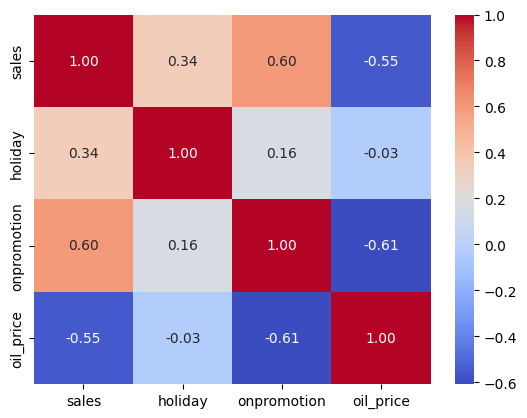

In [ ]:
import seaborn as sns
# Create a heat map
correlation_matrix = daily_sales.corr()

# Create a heat map of the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

In [ ]:
daily_sales = daily_sales.asfreq('D')
daily_sales['sales'] = daily_sales['sales'].fillna(0)
daily_sales['holiday'] = daily_sales['holiday'].fillna(1)
daily_sales['onpromotion'] = daily_sales['onpromotion'].fillna(0)

# oil_price:
daily_sales['oil_price'] = daily_sales['oil_price'].interpolate(limit_direction = 'both')

daily_sales.isna().sum()

sales          0
holiday        0
onpromotion    0
oil_price      0
dtype: int64

In [ ]:
import pmdarima as pm
import prophet

In [ ]:
stepwise_model = pm.auto_arima(daily_sales['sales'],
                               exog=daily_sales[['holiday', 'onpromotion', 'oil_price']],
                            start_p=2, start_q=0,
                           max_p=3, max_q=2, m=7, # p,q = 1, 2, 3
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=46228.751, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=45859.970, Time=1.82 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=45583.078, Time=2.55 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=46226.860, Time=0.43 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=46206.371, Time=0.28 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=45869.562, Time=0.79 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=11.21 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=45655.884, Time=0.73 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=45528.434, Time=1.68 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=46190.138, Time=0.76 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, T

In [ ]:
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order
print('order: ',order)
print('seasonal order: ',seasonal_order)

order:  (1, 0, 1)
seasonal order:  (0, 1, 1, 7)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit SARIMA based on helper plots
sar = SARIMAX(daily_sales['sales'],
              exog=daily_sales[['holiday', 'onpromotion', 'oil_price']], #Exclude  'transactions'
                order=order,
                seasonal_order=seasonal_order, #(P, Q, D)
                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                 1688
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood              -22031.700
Date:                           Tue, 20 Jun 2023   AIC                          44079.400
Time:                                   13:51:07   BIC                          44122.818
Sample:                               01-01-2013   HQIC                         44095.483
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -515.1008    507.562     -1.015      0.310   -1509.903     479.702
holiday        60.1861      2.653     22.687      0.000      54.986      65.386
onpromotion    67.1495      1.210     55.484      0.000      64.777      69.522
oil_price     365.5229   2117.357      0.173      0.863   -3784.420    4515.465
ar.L1           0.8470      0.022     38.666      0.000       0.804       0.890
ma.L1          -0.4323      0.034    -12.644      0.000      -0.499      -0.365
ma.S.L7        -0.8227      0.019    -42.664      0.000      -0.860      -0.785
sigma2       2.035e+10      0.002    1.2e+13      0.000    2.03e+10    2.03e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):             11426.90
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+29. Standard errors may be unstable.
"""

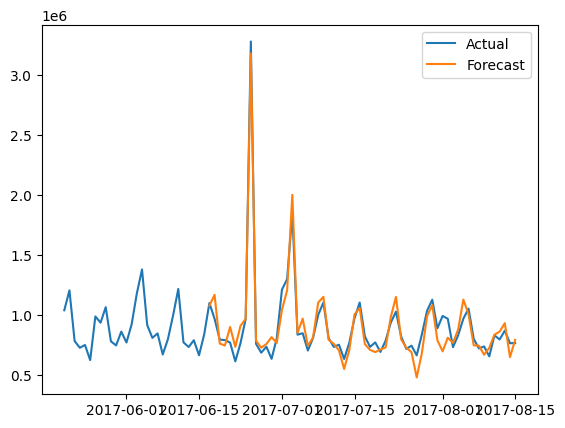

In [ ]:
# Select the last 60 days of data for comparison
last_60_days = daily_sales.iloc[-60:]

# Extract the exogenous variables for the last 60 days
exog_data = last_60_days[['holiday', 'onpromotion', 'oil_price']]

# Get the forecast for the next 60 days, including exogenous variables
forecast = sar.get_prediction(start=last_60_days.index[0], end=last_60_days.index[-1], exog=exog_data)

# Extract the predicted values for the next 60 days
predicted_values = forecast.predicted_mean

# Plot the actual sales and predicted values
plt.plot(daily_sales[1600:]['sales'], label = 'Actual')
plt.plot(predicted_values.index, predicted_values, label='Forecast')
plt.legend()
plt.show()

Using  prophet :

without exogenous variables

In [ ]:
data = pd.DataFrame()
data['y'] = daily_sales['sales']  # Observed value column
data = data.reset_index()
data = data.rename(columns={'date': 'ds'})
data

,ds,y
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1683,2017-08-11,826373.722022
1684,2017-08-12,792630.535079
1685,2017-08-13,865639.677471
1686,2017-08-14,760922.406081


In [ ]:
from prophet import Prophet

m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t_o6qdz/n82fizbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t_o6qdz/xcdps2ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46422', 'data', 'file=/tmp/tmp2t_o6qdz/n82fizbd.json', 'init=/tmp/tmp2t_o6qdz/xcdps2ew.json', 'output', 'file=/tmp/tmp2t_o6qdz/prophet_modelzogys241/prophet_model-20230620135402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make prediction

future1 = m.make_future_dataframe(periods=0)
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
daily_sales['forecast_2.1'] = forecast1['yhat'].values

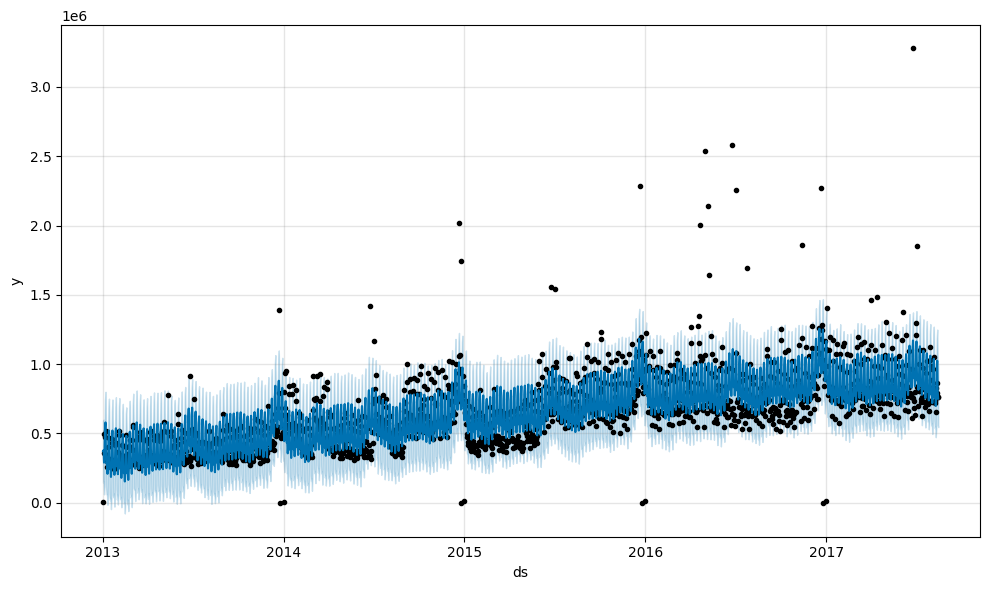

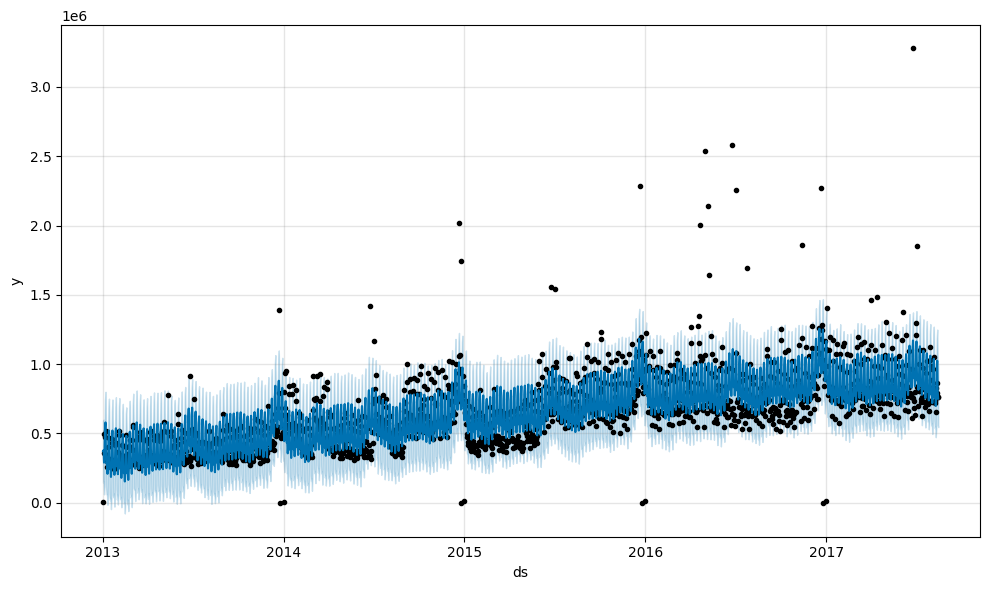

In [ ]:
m.plot(forecast1)

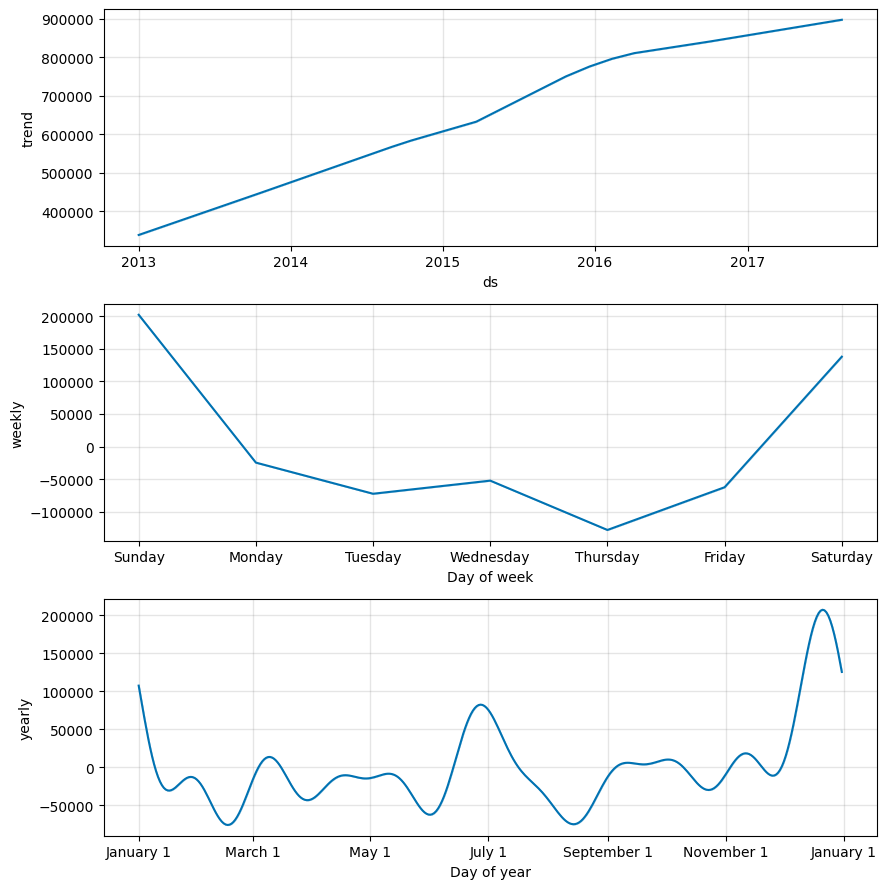

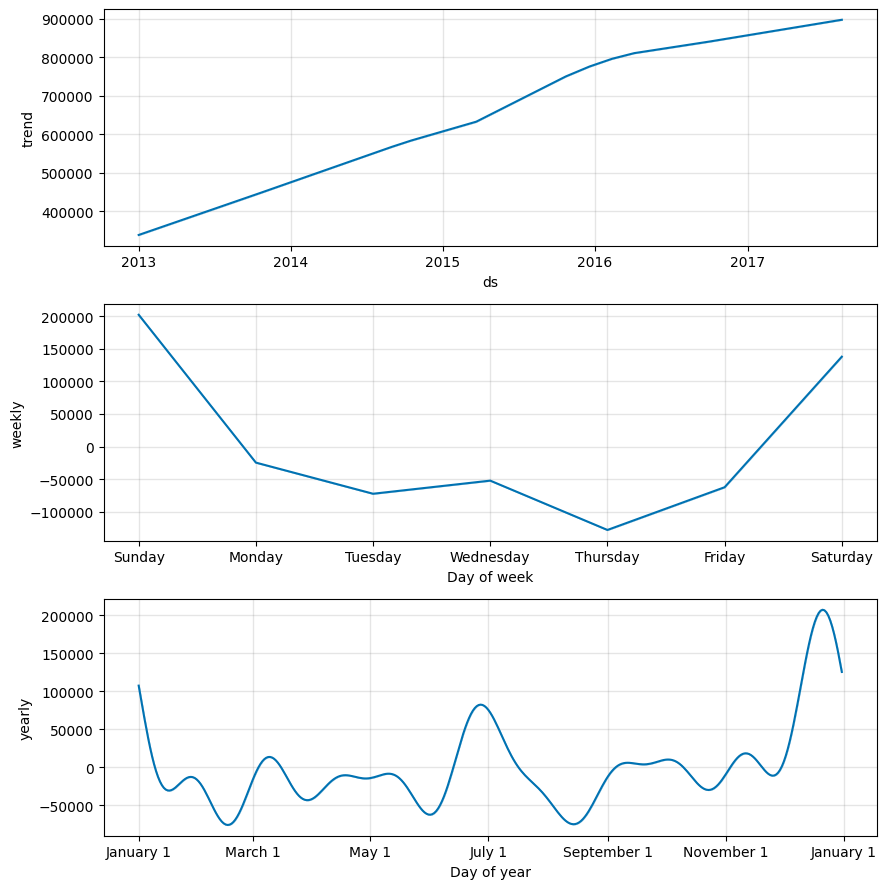

In [ ]:
m.plot_components(forecast1)

with exogenous variables

In [ ]:
# Prepare data
data = pd.DataFrame()
data = daily_sales.copy()
data = data.reset_index()
data = data.rename(columns={'sales': 'y'})
data = data.rename(columns={'date': 'ds'})
data = data[['ds', 'y', 'holiday', 'onpromotion', 'oil_price']]

In [ ]:
m = Prophet()
m.add_regressor('holiday')
m.add_regressor('onpromotion')
m.add_regressor('oil_price')

m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t_o6qdz/_hlh5g9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t_o6qdz/g1olckw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20510', 'data', 'file=/tmp/tmp2t_o6qdz/_hlh5g9k.json', 'init=/tmp/tmp2t_o6qdz/g1olckw1.json', 'output', 'file=/tmp/tmp2t_o6qdz/prophet_modelk6al8dai/prophet_model-20230620135550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:55:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:55:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make prediction
future = m.make_future_dataframe(periods=0)
future['holiday'] = data['holiday']
future['onpromotion'] = data['onpromotion']
future['oil_price'] = data['oil_price']

forecast = m.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'holiday', 'holiday_lower',
       'holiday_upper', 'oil_price', 'oil_price_lower', 'oil_price_upper',
       'onpromotion', 'onpromotion_lower', 'onpromotion_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
1683,2017-08-11,876368.276410,704630.440709,1.066737e+06
1684,2017-08-12,851032.488022,670288.052464,1.029164e+06
1685,2017-08-13,929060.946936,764925.893814,1.109886e+06
1686,2017-08-14,688472.361526,506724.103901,8.705153e+05
1687,2017-08-15,836895.123183,656744.444808,1.001106e+06


prophet with or without exog comparisions

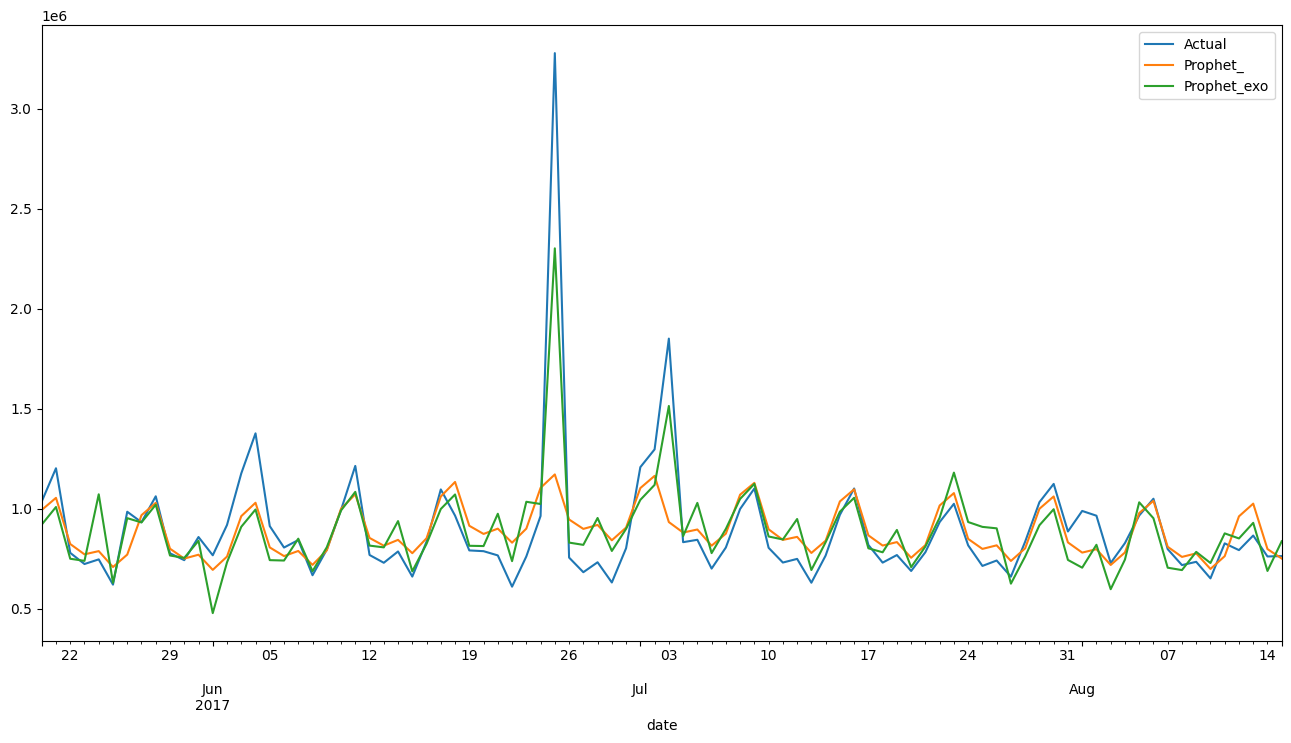

In [ ]:
daily_sales['forecast_2.2'] = forecast['yhat'].values
fig, ax = plt.subplots(figsize=(16, 8))
daily_sales[1600:][['sales', 'forecast_2.1', 'forecast_2.2']].plot(ax=ax);
plt.legend(['Actual', 'Prophet_', 'Prophet_exo'])
plt.show()

It looks like Prophet prediction WITH exogenous variables gives slightly better forecasts than the other. Let's see which model in three here performs better.

In [ ]:
# Compare both Prophet accuracy

pred_SARIMA = predicted_values
pred_Prophet = daily_sales['forecast_2.1'][-60:]
pred_Prophet_exo = daily_sales['forecast_2.2'][-60:]
actual = daily_sales['sales'][-60:]

# Define function to calculate mae, rmse

def mae(pred, actual):
    mae = np.mean(np.abs(pred - actual))
    return mae

def rmse(pred, actual):
    mse = np.mean((pred - actual) ** 2)
    rmse = np.sqrt(mse)
    return mse

def mape(pred, actual):
    absolute_percentage_errors = np.abs((actual - pred) / actual)
    mape = np.mean(absolute_percentage_errors) * 100
    return mape

data = {
    'SARIMA': [mae(pred_SARIMA, actual), rmse(pred_SARIMA, actual), mape(pred_SARIMA, actual)],
    'Prophet': [mae(pred_Prophet, actual), rmse(pred_Prophet, actual), mape(pred_Prophet, actual)],
    'Prophet_exo': [mae(pred_Prophet_exo, actual), rmse(pred_Prophet_exo, actual), mape(pred_Prophet_exo, actual)]


}

df = pd.DataFrame(data, columns=['SARIMA', 'Prophet', 'Prophet_exo'], index=['MAE', 'RMSE', 'MAPE'])
print(df)

            SARIMA       Prophet   Prophet_exo
MAE   7.379725e+04  1.356526e+05  1.173188e+05
RMSE  8.938637e+09  9.886112e+10  3.113760e+10
MAPE  8.565451e+00  1.261665e+01  1.241804e+01
